# Google Colab についての tips まとめ


---
# 1. コードをまとめて実行する方法

左上メニューの `ランタイム` 内の適当なものを選ぶ
  - `再起動してすべてのセルを実行`
    - 基本的にはこちらがオススメ
    - 前の実行結果をすべてリセットしてくれる
      - 前の結果が残っていて変な動作をすることが多数なので<br>
        一度きれいにしてから実行できるコチラがオススメ。 
    - 一度もセルを実行していないと、これは選べない (下記参照）
  - `すべてのセルを実行`
    - `再起動してすべてのセルを実行`が選択できないときはコチラ


---
# 2. Google Colab で Google Drive 上のファイル入出力をする方法

- Q. Google Colab 上のノートブックからファイルにアクセスしたい
  - 何も準備をしないと、`ipynb`と同じディレクトリには
    - ファイルの書き出し -> 何も出てこない
    - ファイルの読み込み -> 「ファイルがありません」系エラーが出る
  - 理由：作業ディレクトリが、全く別のところに設定されている
- A. Google Colab の作業ディレクトリを Google Drive 直下の<br>
     `Colab Notebooks`フォルダに変更すればOK
  - Google Colabを使い始めるときに`Colab Notebooks`が自動生成されるようなので、そのまま使います。
  - 別にどこでもOKだし、後からでも変更可能

### Google Drive のマウントコード

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# GoogleDrive内のColabNotebooksディレクトリへ移動
%cd "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


別ウィンドウなどで、「Google Driveにアクセスしていいか？」的な認証が出るので、確認してOKする。

更に作業ディレクトリを変更したいなら以下の様にする

In [2]:
# 作業ディレクトリへ移動
%cd "./seminar_support"

/content/drive/My Drive/Colab Notebooks/seminar_support


私はサポートページ用のコードを <br>
`~/Colab Notebooks/seminar_support` <br>
にまとめているので、上記のコマンドで移動している。

---
# 3. Google Colab 上の Matplotlib で日本語を表示する方法

`matplotlib` は Python でグラフを書く際に使う便利なライブラリ<br>
しかし、以下の様に日本語を軸などのグラフラベルに使用すると文字化けしてしまう<br>
（グラフの作成方法の詳細は `graph_intro.ipynb` を参照）

In [3]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# 空のDataFrameを作成
df_sin = pd.DataFrame()
# x軸の値を新規設定
df_sin['x'] = np.linspace(-np.pi-0.5, np.pi+0.5, 51)
# y軸の値を設定
df_sin['sin(x)'] = np.sin(df_sin['x'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_

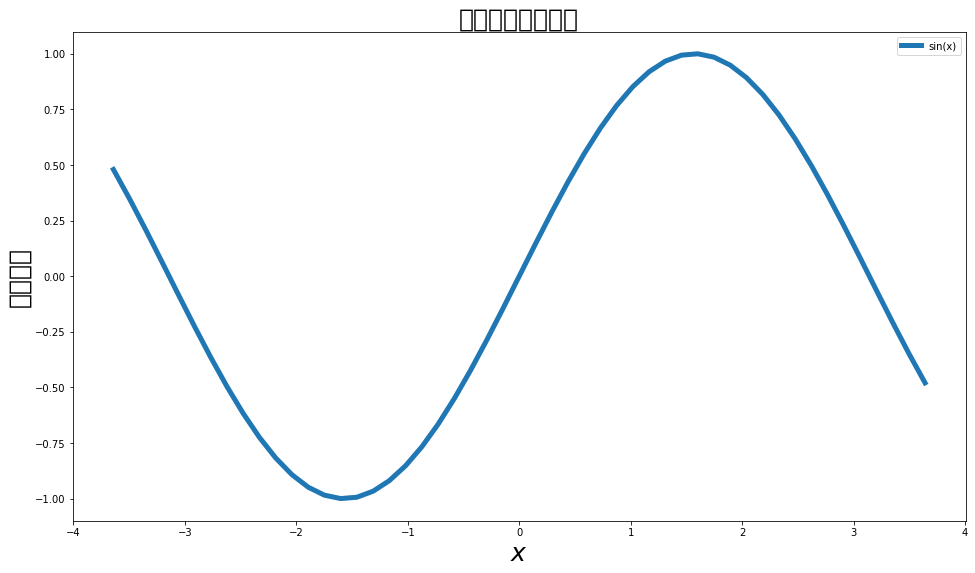

In [5]:
# 描画キャンバスを準備
fig, ax = plt.subplots(ncols=1, nrows=1, sharex='all', figsize=(16, 9))
#
df_sin.plot.line(ax=ax, x='x', y='sin(x)', linewidth=5)
#　ラベルを付ける
plt.xlabel("$x$", fontsize=25)
plt.ylabel("わいじく", fontsize=25)
#
plt.title('グラフのタイトル', fontsize=25)
#
plt.show()

上のグラフではy軸のラベルとグラフタイトルが文字化けしている。<br>
これを解決するには、`japanize_matplitlib` をインストールする。<br>
以下のセルの内容を記述すればOK

In [6]:
!pip install japanize-matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


同じコードを再度実行すると、今度は日本語がきちんと表示される。

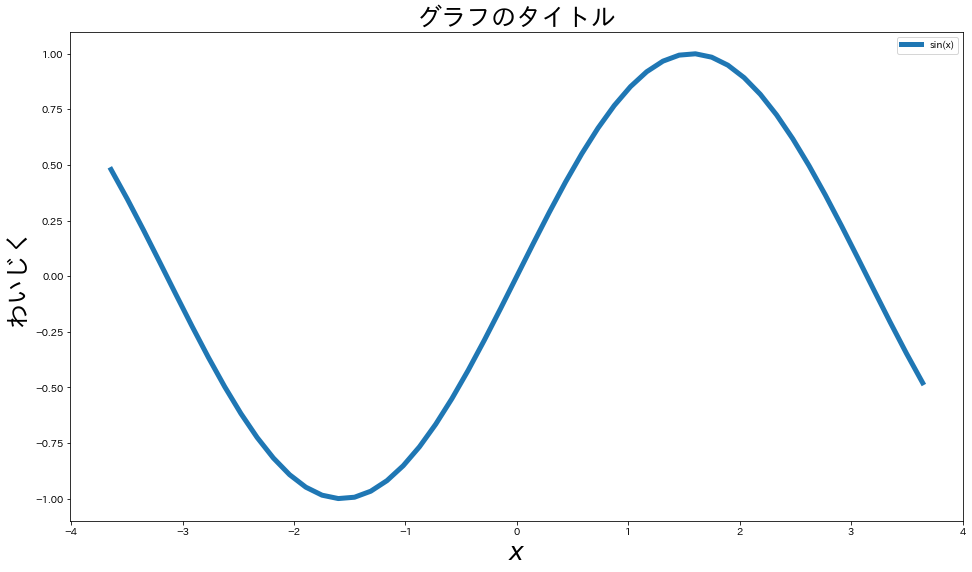

In [7]:
# 描画キャンバスを準備
fig, ax = plt.subplots(ncols=1, nrows=1, sharex='all', figsize=(16, 9))
#
df_sin.plot.line(ax=ax, x='x', y='sin(x)', linewidth=5)
#　ラベルを付ける
plt.xlabel("$x$", fontsize=25)
plt.ylabel("わいじく", fontsize=25)
#
plt.title('グラフのタイトル', fontsize=25)
#
plt.show()